# Exploratory Factor Analysis (EFA) - Visualization

In [1]:
# Chargement des librairies
import pandas as pd

from scientisttools.extractfactor import summaryEFA
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [2]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_AFP",index_col=0)
display(D.head(6))

,CYL,PUISS,LONG,LARG,POIDS,VMAX,RND1,RND2,RND3,RND4,RND5,RND6
Modele,,,,,,,,,,,,
Alfasud TI,1350,79,393,161,870,165,1.029,0.109,0.267,-0.949,0.053,-1.144
Audi 100,1588,85,468,177,1110,160,0.379,0.367,-1.054,0.106,1.316,1.632
Simca 1300,1294,68,424,168,1050,152,-0.346,0.737,-0.056,-0.430,0.274,1.044
Citroen GS Club,1222,59,412,161,930,151,0.849,0.494,-0.320,0.729,0.637,0.793
Fiat 132,1585,98,439,164,1105,165,-1.425,-0.210,0.535,-0.200,-1.983,0.832
Lancia Beta,1297,82,429,169,1080,160,0.890,0.071,-1.308,-0.971,-0.131,-1.134


In [3]:
# Instanciation
from scientisttools.decomposition import EFA
res_efa = EFA(standardize=True,n_components=None)
res_efa.fit(D)

EFA()

## Eigenvalues

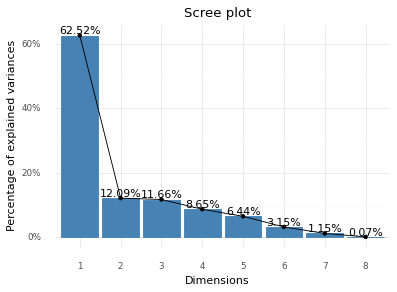

In [4]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(res_efa,add_labels=True)
print(p)

## Individuals

### Color by RGB color

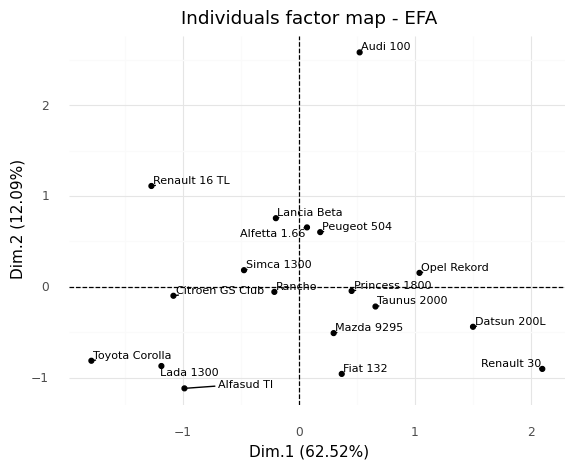

In [5]:
from scientisttools.ggplot import fviz_efa_ind
p = fviz_efa_ind(res_efa,repel=True)
print(p)

### Color by quantitatives color

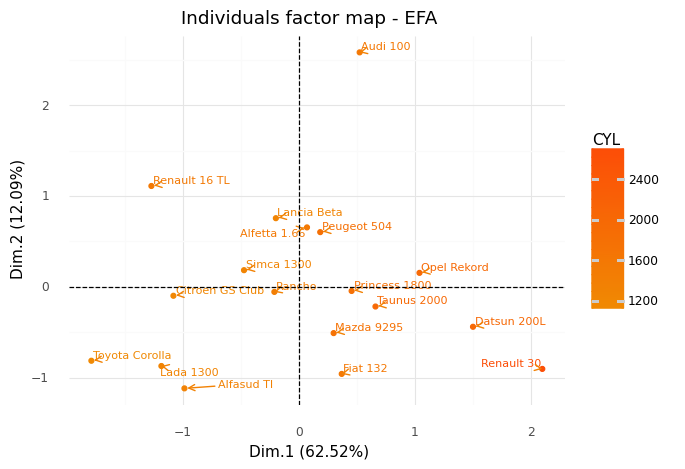

In [6]:
p = fviz_efa_ind(res_efa,color="CYL",repel=True)
print(p)

### Color by numpy array

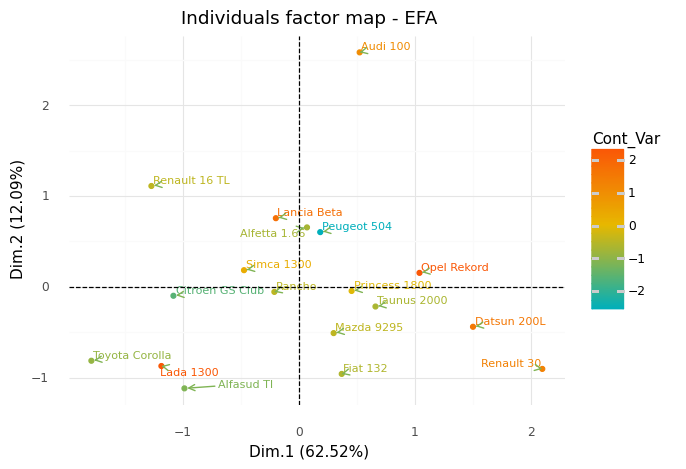

In [7]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_efa.call_["X"].shape[0])
p = fviz_efa_ind(res_efa,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

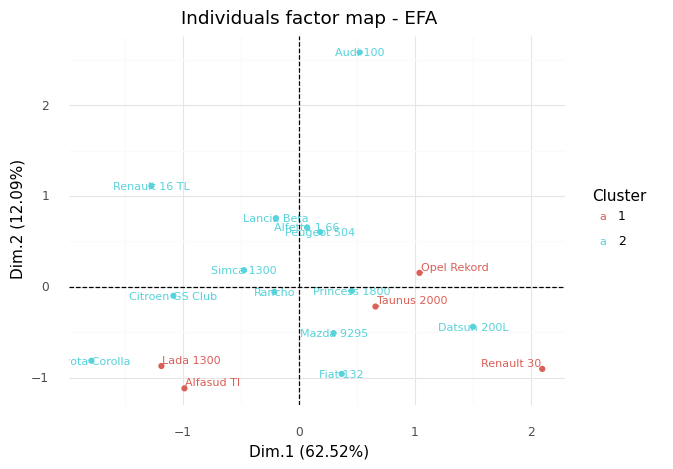

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_efa.ind_["coord"])
p = fviz_efa_ind(res_efa,color=kmeans,repel=True)
print(p)

## Variables

### Color bu RGB color

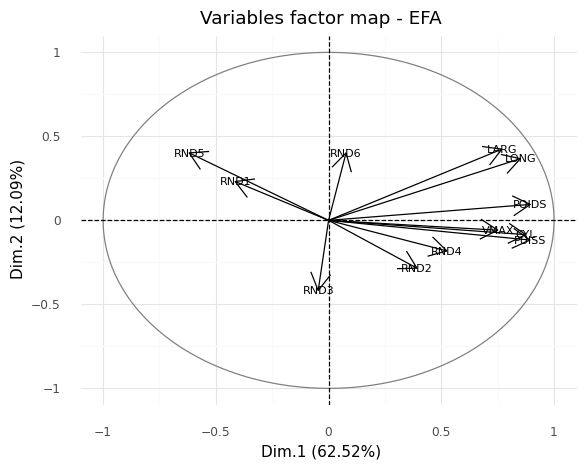

In [9]:
from scientisttools.ggplot import fviz_efa_var
p = fviz_efa_var(res_efa)
print(p)

### Color by contrib

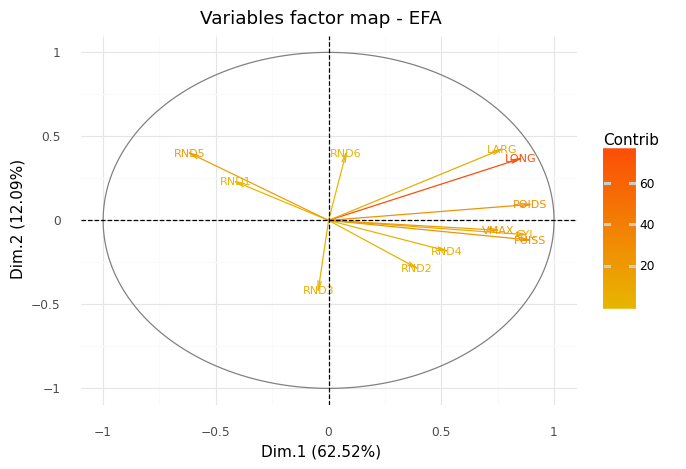

In [10]:
p = fviz_efa_var(res_efa,color="contrib")
print(p)

### Color by numy array

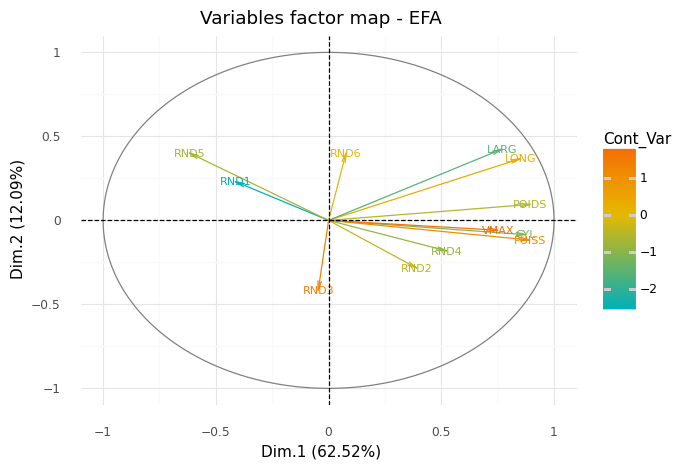

In [11]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_efa.call_["X"].shape[1])
p = fviz_efa_var(res_efa,color=color_numpy)
print(p)

### Color by kmeans

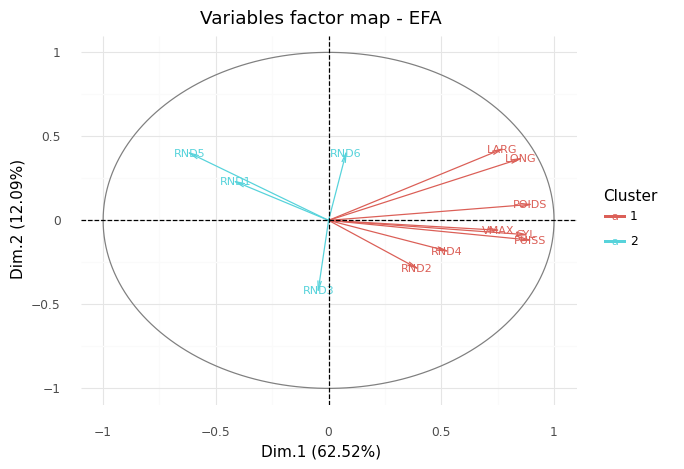

In [12]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_efa.var_["coord"])
p = fviz_efa_var(res_efa,color=kmeans)
print(p)

### Set limit

#### limit ccontrib

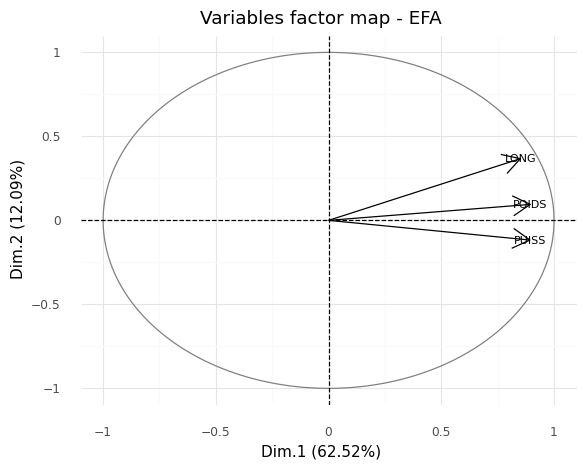

In [13]:
p = fviz_efa_var(res_efa,lim_contrib=20)
print(p)